In [1]:
import gensim

Word2VecModel = gensim.models.Word2Vec.load(r'weibo_word2vec\200\weibo_59g_embedding_200.model') # 读取词向量

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

classify_data = pd.read_csv('data/classify_data.csv')
LHF = classify_data[classify_data['followers_count']<1000][classify_data['label']=='HF']
HLF = classify_data[classify_data['followers_count']>=1000][classify_data['label']=='LF']

LHF = LHF[['text', 'label']]
LHF['label'] = 'LHF'
HLF = HLF[['text', 'label']]
HLF['label'] = 'HLF'

cla_data = HLF.append(LHF)
Counter(cla_data['label'])

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Counter({'HLF': 3452, 'LHF': 1326})

In [3]:
import re
import jieba

def seg_sentence(s):
    sent = ''
    s = s.strip()  #去前后的空格
    s = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", s) #去标点符号
    words = jieba.cut(s)
    sent = ' '.join(words)
    return sent
cla_data['seg'] = cla_data['text'].apply(seg_sentence)
cla_data.head()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ChuAI\AppData\Local\Temp\jieba.cache
Loading model cost 0.972 seconds.
Prefix dict has been built successfully.


,text,label,seg
8840,急找孩子，求转 寻人启事 13930886687 帮忙扩散，今天上午一个三岁多小女孩在魏县三...,HLF,急 找 孩子 求转 寻人启事 帮忙 扩散 今天上午 一个三岁 多 小女孩 在...
8853,今天邵逸夫先生出殡了一个外国人乔布斯去世的时候我们中国人铺天卷地的刷屏，而邵逸夫去世了，却没...,HLF,今天 邵逸夫 先生 出殡 了 一个 外国人 乔布斯 去世 的 时候 我们 中国 人铺 天卷 ...
8860,"求辟谣…… 乌鲁木齐市人民医院昨天凌晨四点二十一分,因H7N9死亡,年龄31岁,孩子还在妈妈...",HLF,求 辟谣 乌鲁木齐市 人民 医院 昨天 凌晨 四点 二十一分 因 死亡 年龄...
8872,今天邵逸夫先生出殡了……我们有千百个学校的教学楼叫做“逸夫教学楼”，多少医院有“逸夫门诊楼＂...,HLF,今天 邵逸夫 先生 出殡 了 我们 有 千百个 学校 的 教学楼 叫做 逸夫 教学楼...
8873,今天邵逸夫先生出殡了...一个外国人乔布斯死，我们中国人铺天卷地的刷屏，而邵逸夫去世了，却没...,HLF,今天 邵逸夫 先生 出殡 了 一个 外国人 乔布斯 死 我们 中国 人铺 天卷 地 ...


In [4]:
def sen2vec(seg):
    words = seg.split(' ')
    sen2vec = np.zeros(200)
    i = 0
    for word in words:
        try:
            word2vec = Word2VecModel.wv[word]
            sen2vec += word2vec
            i += 1
        except:
            continue
    return sen2vec/i

cla_data['sen2vec'] = cla_data['seg'].apply(sen2vec)
cla_data.head()

,text,label,seg,sen2vec
8840,急找孩子，求转 寻人启事 13930886687 帮忙扩散，今天上午一个三岁多小女孩在魏县三...,HLF,急 找 孩子 求转 寻人启事 帮忙 扩散 今天上午 一个三岁 多 小女孩 在...,"[-0.9285101519995614, -0.2537214471223323, 0.8..."
8853,今天邵逸夫先生出殡了一个外国人乔布斯去世的时候我们中国人铺天卷地的刷屏，而邵逸夫去世了，却没...,HLF,今天 邵逸夫 先生 出殡 了 一个 外国人 乔布斯 去世 的 时候 我们 中国 人铺 天卷 ...,"[-1.2712085105250686, -0.07068959091390882, -0..."
8860,"求辟谣…… 乌鲁木齐市人民医院昨天凌晨四点二十一分,因H7N9死亡,年龄31岁,孩子还在妈妈...",HLF,求 辟谣 乌鲁木齐市 人民 医院 昨天 凌晨 四点 二十一分 因 死亡 年龄...,"[-0.34762299778487754, -0.7638122402679395, 0...."
8872,今天邵逸夫先生出殡了……我们有千百个学校的教学楼叫做“逸夫教学楼”，多少医院有“逸夫门诊楼＂...,HLF,今天 邵逸夫 先生 出殡 了 我们 有 千百个 学校 的 教学楼 叫做 逸夫 教学楼...,"[-1.3430091462138554, 0.0671889854433096, -0.3..."
8873,今天邵逸夫先生出殡了...一个外国人乔布斯死，我们中国人铺天卷地的刷屏，而邵逸夫去世了，却没...,HLF,今天 邵逸夫 先生 出殡 了 一个 外国人 乔布斯 死 我们 中国 人铺 天卷 地 ...,"[-1.2504544339845984, -0.007973920021738325, -..."


In [5]:
LHF_news = cla_data[cla_data['label']=='LHF']
HLF_news = cla_data[cla_data['label']=='HLF']
LHF_text = ['5月12日不要去电影院。请大家一定别进影院，大家一起为贞子票房为零，做努力！ 中国人拍的《金陵十三钗》在日本小鬼子票房为零。小日本拍的贞子3D将于5月12日在中国大陆上映。而5月12日既是南京大屠杀纪念日，又是国难日。勿忘国耻！作为中国人，敢不敢让贞子3D 5月12日票房为零。朋友们，必须转起转起',
            '#天津塘沽大爆炸#我不确定文字真实 我只知道我很感动 我只知道几批消防队员没有生还 他们奔赴爆炸现场的时候那种无畏 可他们为了人民 真的很伟大  没错我做不了什么 我只能给予他们最真诚的感谢🙏   我只是一个刚刚成年的学生 看法自然稚嫩 我只希望人们可以做好自己该做的事 不要被利益地位冲昏头脑',
            '朋友捡到一个准考证，有认识的通知一下：姓名：白娅倩、考点：一中、考场：013、座号：11、准考证号：204101311。联系电话：15935078941。别耽误孩子高考。帮助别人手留余香！谢谢！@开心消消乐 @Happy张江 @上海浦东川沙派出所 @互动川沙',
            '爱心接力：胡云星，女，四岁半，运城人。救救她，她患有罕见的“布加氏综合征”对激素已经产生抗体，体重不断上升，每天不停地重复一句话：妈妈，疼!希望大家帮帮她，多一个人转发多一份力量，@韩红爱心慈善基金会 @365儿童救助爱心基金',
            '今天下午六点开始，全市高清探头全部启用，副驾驶不系安全带相同处罚，开车时打电话罚款50元，闯黄闪罚款200，越线停车罚款100，今天起晚六点至深夜2点，为期60天的全国交警集中查处酒驾，一经查获，一律拘役六个月，五年内不得考证。请相互转告至有车的本人、朋友及亲属，避免罚款']
HLF_text = ['紧急通知： 妇幼保健院通知、：现在得白血病的小孩越来越多，妇幼保健院提示您，请不要给宝宝喝爽歪歪和有添加剂的牛奶饮料，告诉家里有小孩的朋友，旺仔牛奶、可口可乐、爽歪歪、娃哈哈AD钙奶、未来星、Q星、美汁源果粒奶优的。都含有肉毒杆菌。现在紧急召回。有孩子的都转下！！！   没娃转转！！！',
           '看，安利老板死了！才56岁，吃了27年的纽崔莱，好讽刺啊。再看！安利成冠3S系统创始人陈观田因肝癌56岁去世,干了27年安利,27年纽崔莱,为美国人赚了27年钱。请再看，安利大师超凡创办人王慈官《远离贫穷》的作者，在福州逝世.天天吃安利保健品享年61岁。',
           '在宁波已发现中国国内第一起埃博拉，此疾病基本死亡率90%。流入中国时间比专家预估时间早十天。大家务必提醒孩子和家人随时肥皂洗手，不吃街边摊和露天食物，买回家的成品食物务必煮开食用，防范在先！切记此次埃博拉极可能发展为比SARS更可怕的瘟疫。大家注意卫生，保重！😳',
           '小女孩死于用完没有收好的手机充电器，她将充电器的一端放进嘴里，触电身亡，女孩父母悔恨不已，主动站起来警示大家！请不要让悲剧重复！',
           '【可恶！骆驼被砍四肢当街行乞】骆驼一般只在动物园才能见到，但近日，人们却在福州街头见到一只乞讨的骆驼。骆驼身旁有两位衣衫褴褛的人跪在地上磕头乞讨。民警发现，骆驼的四肢均有不同程度的损伤，四肢均无蹄子，据伤口观测有很大可能是人为造成。警方已协调相关部门处理']
def target(text):
    target = 0
    if text in LHF_text:
        target = 1
    elif text in HLF_text:
        target = 2
    else:
        pass
    return target
LHF_news['target'] = LHF_news['text'].apply(target)
HLF_news['target'] = HLF_news['text'].apply(target)

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
for j in range(200):
    LHF_news[str(j)] = LHF_news['sen2vec'].apply(lambda a: a[j])
    HLF_news[str(j)] = HLF_news['sen2vec'].apply(lambda a: a[j])

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
import sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
from mpl_toolkits.mplot3d import axes3d 
import seaborn as sns
from matplotlib import style

RS = 2020
X = LHF_news.loc[:,'0':'199'].values
y = LHF_news['target'].values
X2D = TSNE(random_state=RS).fit_transform(X)
X2D = pd.DataFrame(X2D)
X2D['target'] = y

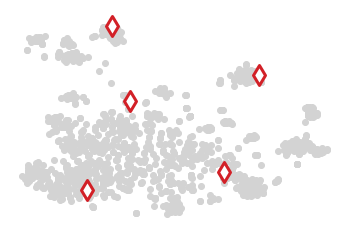

In [17]:
fig, ax = plt.subplots()
ax.scatter(X2D.iloc[:,0][X2D['target']==0],X2D.iloc[:,1][X2D['target']==0], color='lightgrey')
ax.scatter(X2D.iloc[:,0][X2D['target']==1],X2D.iloc[:,1][X2D['target']==1], 
           marker='d', s=200, 
           edgecolors='#D22027',
           facecolors='white',
           linewidth=3
          )
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('images/LHF-text.pdf')
plt.show()

In [18]:
RS = 2020
X = HLF_news.loc[:,'0':'199'].values
y = HLF_news['target'].values
X2D = TSNE(random_state=RS).fit_transform(X)
X2D = pd.DataFrame(X2D)
X2D['target'] = y

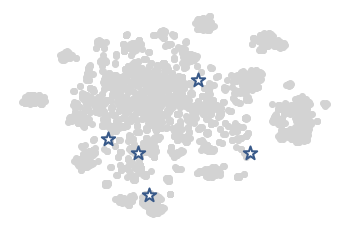

In [20]:
fig, ax = plt.subplots()
ax.scatter(X2D.iloc[:,0][X2D['target']==0],X2D.iloc[:,1][X2D['target']==0], color='lightgrey')
ax.scatter(X2D.iloc[:,0][X2D['target']==2],X2D.iloc[:,1][X2D['target']==2], marker='*', s=200, 
           edgecolors='#385989',
           facecolors='white',
           linewidth=2
          )
plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('images/HLF-text.pdf')
plt.show()

In [21]:
from collections import Counter
key_words_LHF = []
key_words_HLF = []
with open('data/key_words_LHF_2.txt', 'r', encoding='utf-8-sig') as f:
    for word in f:
        word = word.strip()
        tup = (word, 'LHF')
        key_words_LHF.append(tup)
with open('data/key_words_HLF.txt', 'r', encoding='utf-8-sig') as f:
    for word in f:
        word = word.strip()
        tup = (word, 'HLF')
        key_words_HLF.append(tup)

key_words_LHF = pd.DataFrame(key_words_LHF)
key_words_HLF = pd.DataFrame(key_words_HLF)
key_words_LHF.columns = ['word', 'label']
key_words_HLF.columns = ['word', 'label']

In [22]:
def word2vec(word):
    word2vec = '-1'
    try:
        word2vec = Word2VecModel.wv[word]
    except:
        pass
    return word2vec
key_words_LHF['word2vec'] = key_words_LHF['word'].apply(word2vec)
key_words_HLF['word2vec'] = key_words_HLF['word'].apply(word2vec)

In [23]:
key_words_LHF = key_words_LHF[key_words_LHF['word2vec']!='-1']
key_words_HLF = key_words_HLF[key_words_HLF['word2vec']!='-1']
LHF_words = ['贞子', '票房', '南京大屠杀', '纪念日', '勿忘', '国耻', '转起', '天津', '塘沽', '爆炸', '感动', '感谢', '朋友',
            '一下', '帮助', '谢谢', '爱心', '转发', '罚款', '转告']
HLF_words = ['紧急', '爽歪歪', '添加剂', '牛奶', '旺仔', '哇哈哈', '钙奶', '奶优', '肉毒', '杆菌', '召回', '安利', '骆驼',
            '动物', '瘟疫', '小女孩', '充电器', '警示', '悲剧']
def target(word):
    target = 0
    if word in LHF_words:
        target = 1
    elif word in HLF_words:
        target = 2
    else:
        pass
    return target
key_words_LHF['target'] = key_words_LHF['word'].apply(target)
key_words_HLF['target'] = key_words_HLF['word'].apply(target)
for j in range(200):
    key_words_LHF[str(j)] = key_words_LHF['word2vec'].apply(lambda a: a[j])
    key_words_HLF[str(j)] = key_words_HLF['word2vec'].apply(lambda a: a[j])

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\pandas\core\ops.py:1122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x, y, op)


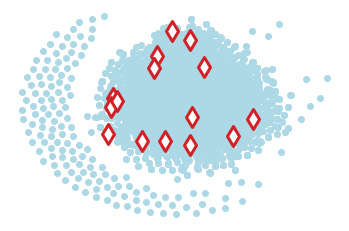

In [24]:
RS = 2020
X = key_words_LHF.loc[:,'0':'199'].values
y = key_words_LHF['target'].values
X2D = TSNE(random_state=RS).fit_transform(X)
X2D = pd.DataFrame(X2D)
X2D['target'] = y

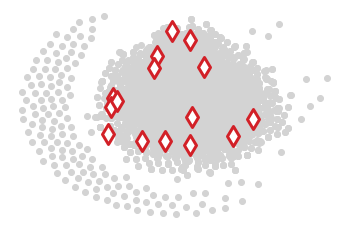

In [25]:
fig,ax = plt.subplots()
ax.scatter(X2D.iloc[:,0][X2D['target']==0],X2D.iloc[:,1][X2D['target']==0], color='lightgrey')
ax.scatter(X2D.iloc[:,0][X2D['target']==1],X2D.iloc[:,1][X2D['target']==1], marker='d', s=200, 
           edgecolors='#D22027',
           facecolors='white',
           linewidth=3) 
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('images/LHF-words.pdf')
plt.show()

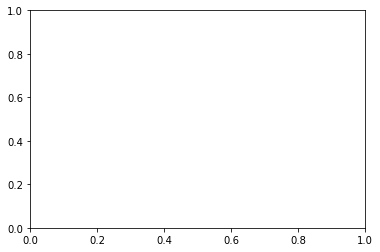

In [26]:
fig,ax1 = plt.subplots()
RS = 2020
X = key_words_HLF.loc[:,'0':'199'].values
y = key_words_HLF['target'].values
X2D = TSNE(random_state=RS).fit_transform(X)
X2D = pd.DataFrame(X2D)
X2D['target'] = y

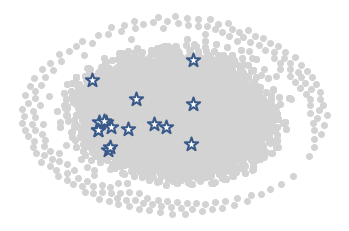

In [28]:
fig,ax = plt.subplots()
ax.scatter(X2D.iloc[:,0][X2D['target']==0],X2D.iloc[:,1][X2D['target']==0], color='lightgrey')
ax.scatter(X2D.iloc[:,0][X2D['target']==2],X2D.iloc[:,1][X2D['target']==2], marker='*', s=200,
            edgecolors='#385989',
            facecolors='white',
            linewidth=2
          )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.savefig('images/HLF-words.pdf')
plt.show()